Cho tập dữ liệu hãy thực hiện các bước phân tích sau: Xây dựng mô hình Logistic Regression nhằm phân lớp sinh viên có định hướng nghề nghiệp (HUONGNGHIEP) hay không dựa trên  các điểm toán các học kì năm cấp 3, điểm thi NGONNGU, LOGIC, UNGXU và giới tính của sinh viên. Biết rằng, ta quy ước với định hướng nghề nghiệp thì No = 1 và Yes = 0
1.	Tải dữ liệu diemthidaihoc.csv và hiển thị các dòng dữ liệu
2.	Với các giá trị định lượng bị thiếu ta thay bằng giá trị 0
3.	Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét
4.	Chia tập dữ liệu thành tập train và test với tỉ lệ 80:20 và random state là 16
5.	Tiến hành transform theo hàm f(x) = √=|x| dữ liệu input đầu vào trên tập train
6.	Tiến hành EDA dữ liệu sau khi transform. Ví dụ: Hãy vẽ biểu đồ phân phối các biến định lượng và cho nhận xét
7.	Tiến hành tiếp tục Polynomial Scaling dữ liệu đầu vào trên tập train với bậc là 2
8.	Xây dựng mô hình Logistic Regression với thông số solvers= liblinear, max_iter = 1000 và penalty = L2
9.	Hãy đánh giá mô hình trên tập train và test. Ví dụ: so sánh kết quả accuracy trên tập train và test đưa ra nhận xét
10.	Ứng dụng dự báo, với điểm toán các học kì 1,2 các năm lớp 10,11,12 và giới tính lần lượt là: 5.0, 6.5, 7.0, 7.0, 6.5, 6.0, giới tính là nam và điểm thi NGONNGU, LOGIC, UNGXU lần lượt là 5.5, 7.0, 4.5 thì sinh viên này có cần hỗ trợ định hướng nghề nghiệp hay không? (lưu ý, ta chỉ định hướng nghề nghiệp nếu giá trị dự báo là No)


# Import thư viện

In [132]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

# 1.Đọc dữ liệu

In [133]:
df = pd.read_csv('dulieuxettuyendaihoc.csv' , header=0,delimiter="," ,encoding="Utf=8")
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


# Tạo một DataFrame mới từ DataFrame gốc

In [134]:
data = df[['T1','T2','T3','T4','T5','T6','TOANLOGICPHANTICH','GT','NGONNGU','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]

# Thực hiện việc đổi tên các cột

In [135]:
data.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'}, inplace=True)
data

C:\Users\Hakate\AppData\Local\Temp\ipykernel_2780\2301323063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'}, inplace=True)


,T1,T2,T3,T4,T5,T6,LOGIC,GT,NGONNGU,UNGXU,HUONGNGHIEP
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,F,3.25,4.50,No
1,5.4,6.3,4.3,4.9,3.0,4.0,4.00,M,6.00,3.50,Yes
2,5.6,5.0,2.8,6.1,4.8,5.7,6.75,M,5.00,4.00,No
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,M,4.25,5.25,No
4,6.0,5.4,7.6,4.4,6.8,8.0,4.50,M,4.25,5.00,No
...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,1.50,F,5.25,6.25,Yes
96,3.7,4.1,3.1,3.4,5.5,5.7,3.75,F,5.25,4.75,No
97,8.8,9.5,9.5,8.5,9.0,8.5,8.00,M,7.00,4.00,Yes
98,2.7,2.8,6.2,5.2,4.1,4.3,3.50,M,5.00,5.50,No


# Kiểm tra giá trị thiếu

In [136]:
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị thiếu trong mỗi cột:
MSSV                    0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
GT                      0
DT                     97
KV                      0
NGONNGU                 0
TOANLOGICPHANTICH       0
GIAIQUYETVANDE          0
KT                      0
NGAYTHI                 0
DINHHUONGNGHENGHIEP     0
dtype: int64


# 2.Thay thế giá trị thiếu trong cột "DT" bằng 0

In [137]:
df['DT'].fillna(0, inplace=True)
#data = data.fillna(0)

# Kiểm tra lại số lượng giá trị thiếu sau khi thay thế
print("Số lượng giá trị thiếu trong mỗi cột sau khi thay thế:")
print(df.isnull().sum())

Số lượng giá trị thiếu trong mỗi cột sau khi thay thế:
MSSV                   0
T1                     0
T2                     0
T3                     0
T4                     0
T5                     0
T6                     0
GT                     0
DT                     0
KV                     0
NGONNGU                0
TOANLOGICPHANTICH      0
GIAIQUYETVANDE         0
KT                     0
NGAYTHI                0
DINHHUONGNGHENGHIEP    0
dtype: int64


# 3.	Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét

# one-hot encoding cho cột có tên là 'GT'

In [138]:
df = pd.get_dummies(df, columns=['GT'], dtype=int)
df.head(20)

,MSSV,T1,T2,T3,T4,T5,T6,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP,GT_F,GT_M
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,0.0,2NT,3.25,3.25,4.50,A1,12/7/2018,No,1,0
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,0.0,1,6.00,4.00,3.50,C,12/7/2018,Yes,0,1
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,0.0,1,5.00,6.75,4.00,C,12/7/2018,No,0,1
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,0.0,1,4.25,4.25,5.25,D1,12/7/2018,No,0,1
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,0.0,2NT,4.25,4.50,5.00,A,12/7/2018,No,0,1
5,SV006,9.3,9.6,7.1,8.5,8.5,7.8,0.0,1,1.50,4.00,6.00,D1,12/7/2018,No,0,1
6,SV007,2.8,4.4,4.6,4.7,5.4,5.3,0.0,2,6.50,6.75,5.25,C,12/7/2018,Yes,1,0
7,SV008,8.3,6.7,8.6,8.3,8.5,8.3,0.0,2,3.75,4.50,4.25,D1,12/7/2018,Yes,1,0
8,SV009,6.5,7.3,6.4,8.1,7.7,7.7,0.0,1,3.50,3.50,6.75,D1,12/7/2018,Yes,1,0
9,SV0010,7.3,8.0,6.5,5.5,7.5,6.9,0.0,1,4.00,4.75,5.50,D1,12/7/2018,Yes,1,0


# Quy ước định hướng nghề nghiệp thì No = 1 và Yes = 0

In [139]:
# huongnghiep = pd.get_dummies(data['HUONGNGHIEP'], drop_first=True)
# data.drop('HUONGNGHIEP',axis=1,inplace=True)
# data = pd.concat([data,huongnghiep], axis=1)
# data.head(8)
# data.head(8)
# data['HUONGNGHIEP'] = data['HUONGNGHIEP'].map({'No': 1, 'Yes': 0})
# data['HUONGNGHIEP'] = data['HUONGNGHIEP'].replace({'No': 1, 'Yes': 0})
data.loc[:, 'HUONGNGHIEP'] = data['HUONGNGHIEP'].map({'No': 1, 'Yes': 0})

C:\Users\Hakate\AppData\Local\Temp\ipykernel_2780\2399845559.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'HUONGNGHIEP'] = data['HUONGNGHIEP'].map({'No': 1, 'Yes': 0})
C:\Users\Hakate\AppData\Local\Temp\ipykernel_2780\2399845559.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'HUONGNGHIEP'] = data['HUONGNGHIEP'].map({'No': 1, 'Yes': 0})


# Tạo ra hai cột mới ('GT_Nam' và 'GT_Nu') dựa trên giá trị của cột 'GT' (giới tính)

In [140]:
data['GT_Nam'] = (data['GT'] == 'M').astype(int)

# Tạo cột mới cho giới tính nữ 
data['GT_Nu'] = (data['GT'] == 'F').astype(int)

# Xóa cột GT cũ
data = data.drop(columns=['GT'])

print(data.head())

    T1   T2   T3   T4   T5   T6  LOGIC  NGONNGU  UNGXU  HUONGNGHIEP  GT_Nam  \
0  7.2  8.4  7.4  7.2  7.4  6.9   3.25     3.25   4.50            1       0   
1  5.4  6.3  4.3  4.9  3.0  4.0   4.00     6.00   3.50            0       1   
2  5.6  5.0  2.8  6.1  4.8  5.7   6.75     5.00   4.00            1       1   
3  6.6  5.1  5.9  4.1  6.1  7.4   4.25     4.25   5.25            1       1   
4  6.0  5.4  7.6  4.4  6.8  8.0   4.50     4.25   5.00            1       1   

   GT_Nu  
0      1  
1      0  
2      0  
3      0  
4      0  


C:\Users\Hakate\AppData\Local\Temp\ipykernel_2780\2422052149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GT_Nam'] = (data['GT'] == 'M').astype(int)
C:\Users\Hakate\AppData\Local\Temp\ipykernel_2780\2422052149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GT_Nu'] = (data['GT'] == 'F').astype(int)


In [141]:
print(data.describe())
# Dựa vào kết quả thống kê cơ bản của các biến, tôi có một số nhận xét:

# Số lượng quan sát (count) là 100, đầy đủ cho tất cả các biến.
# Điểm trung bình (mean) của các môn học dao động từ 3.74 đến 6.93. Trong đó T5, T6 và LOGIC có điểm trung bình cao hơn so với NGONNGU và UNGXU.
# Độ lệch chuẩn (std) của các điểm thi dao động từ 1.04 đến 1.47. Cho thấy sự phân bố của điểm thi khá đồng đều, không có sự chênh lệch lớn.
# Giá trị nhỏ nhất (min) và lớn nhất (max) cho thấy điểm thi có phạm vi rộng, từ 3 - 9.5 điểm.
# Biến HUONGNGHIEP có giá trị trung bình 0.55, cho thấy số lượng mẫu dữ liệu có định hướng nghề nghiệp (1) và không có định hướng (0) khá cân bằng.
# Từ giá trị trung vị (median) và phân vị (quantile) cho thấy phân bố điểm thi các môn tập trung vào khoảng trung bình khá.
# Nhìn chung, tập dữ liệu khá cân bằng, hợp lý để xây dựng mô hình phân loại. Cần xem xét thêm các yếu tố như tương quan giữa các biến để đánh giá kỹ hơn.

               T1          T2          T3          T4          T5        T6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.0000   
mean     5.946000    6.374000    6.383000    6.291000    6.717000    6.9370   
std      1.608338    1.561443    1.574484    1.469563    1.478059    1.3632   
min      2.400000    2.800000    2.300000    2.900000    3.000000    3.7000   
25%      5.000000    5.300000    5.175000    5.300000    5.800000    6.0000   
50%      5.850000    6.250000    6.650000    6.350000    6.800000    7.1000   
75%      7.200000    7.525000    7.500000    7.600000    7.800000    8.0000   
max      9.300000    9.600000    9.500000    9.400000    9.500000    9.5000   

            LOGIC     NGONNGU       UNGXU  HUONGNGHIEP      GT_Nam       GT_Nu  
count  100.000000  100.000000  100.000000       100.00  100.000000  100.000000  
mean     4.255000    3.740000    4.875000         0.55    0.520000    0.480000  
std      1.060053    1.424408    1.041136    

# Đoạn code này tạo ra hai mảng NumPy (X và y) từ DataFrame data.

In [142]:
X=data[['T1','T2','T3','T4','T5','T6','LOGIC','NGONNGU','UNGXU','GT_Nam','GT_Nu']].values
y=data[['HUONGNGHIEP']].values

# Chia tập dữ liệu thành tập train và test với tỉ lệ 80:20 và random state là 16

In [143]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 11)
(20, 11)
(80, 1)
(20, 1)


In [144]:
X_train

array([[3.7 , 4.1 , 3.1 , 3.4 , 5.5 , 5.7 , 3.75, 5.25, 4.75, 0.  , 1.  ],
       [9.3 , 9.6 , 7.1 , 8.5 , 8.5 , 7.8 , 4.  , 1.5 , 6.  , 1.  , 0.  ],
       [8.1 , 8.8 , 9.2 , 8.8 , 8.9 , 8.5 , 4.  , 6.25, 6.5 , 1.  , 0.  ],
       [4.9 , 6.1 , 2.5 , 6.2 , 4.9 , 6.5 , 5.5 , 1.  , 4.25, 1.  , 0.  ],
       [4.6 , 7.2 , 7.6 , 6.2 , 8.  , 7.2 , 4.5 , 4.5 , 5.5 , 1.  , 0.  ],
       [5.7 , 3.9 , 5.7 , 4.6 , 6.8 , 7.3 , 4.5 , 2.5 , 4.25, 1.  , 0.  ],
       [4.3 , 5.3 , 7.3 , 7.7 , 7.4 , 7.1 , 4.  , 2.75, 4.  , 1.  , 0.  ],
       [7.9 , 8.2 , 8.1 , 6.9 , 8.  , 8.1 , 6.5 , 6.75, 4.25, 1.  , 0.  ],
       [5.2 , 6.3 , 7.8 , 7.6 , 6.2 , 7.3 , 4.  , 3.  , 5.5 , 0.  , 1.  ],
       [6.3 , 6.3 , 5.2 , 6.1 , 6.  , 5.7 , 4.75, 2.  , 6.5 , 1.  , 0.  ],
       [6.9 , 5.4 , 5.3 , 5.3 , 7.2 , 7.1 , 4.5 , 2.  , 5.  , 0.  , 1.  ],
       [6.5 , 5.3 , 6.1 , 5.7 , 7.1 , 6.9 , 5.  , 2.5 , 5.  , 1.  , 0.  ],
       [4.4 , 4.4 , 5.1 , 5.6 , 5.8 , 5.8 , 3.  , 2.  , 5.25, 1.  , 0.  ],
       [5.6 , 5.  , 2.8 ,

# 5.	Tiến hành transform theo hàm f(x) = √=|x| dữ liệu input đầu vào trên tập train

In [145]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def sqrt_abs_trans(X):
    return np.sqrt(np.abs(X))

sqrt_abs = FunctionTransformer(sqrt_abs_trans)

X_train = sqrt_abs.fit_transform(X_train)
X_train


array([[1.92353841, 2.02484567, 1.76068169, 1.84390889, 2.34520788,
        2.38746728, 1.93649167, 2.29128785, 2.17944947, 0.        ,
        1.        ],
       [3.04959014, 3.09838668, 2.66458252, 2.91547595, 2.91547595,
        2.79284801, 2.        , 1.22474487, 2.44948974, 1.        ,
        0.        ],
       [2.84604989, 2.96647939, 3.03315018, 2.96647939, 2.98328678,
        2.91547595, 2.        , 2.5       , 2.54950976, 1.        ,
        0.        ],
       [2.21359436, 2.46981781, 1.58113883, 2.48997992, 2.21359436,
        2.54950976, 2.34520788, 1.        , 2.06155281, 1.        ,
        0.        ],
       [2.14476106, 2.68328157, 2.75680975, 2.48997992, 2.82842712,
        2.68328157, 2.12132034, 2.12132034, 2.34520788, 1.        ,
        0.        ],
       [2.38746728, 1.97484177, 2.38746728, 2.14476106, 2.60768096,
        2.70185122, 2.12132034, 1.58113883, 2.06155281, 1.        ,
        0.        ],
       [2.07364414, 2.30217289, 2.70185122, 2.77488739, 2.

# Biểu đồ histogram của các cột trong ma trận X_train.

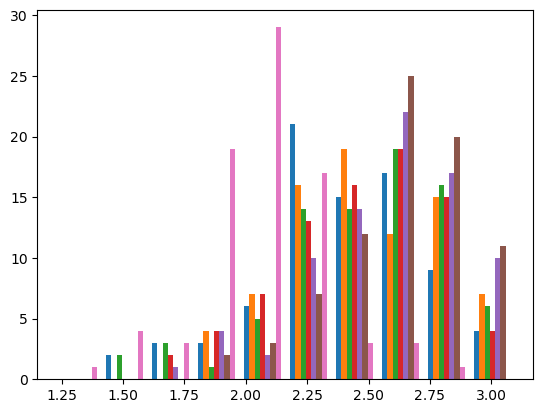

In [146]:
import matplotlib.pyplot as plt
plt.hist(X_train[:,[0,1,2,3,4,5,6]])
plt.show()

# 7.	Tiến hành tiếp tục Polynomial Scaling dữ liệu đầu vào trên tập train với bậc là 2

In [147]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train) 


# 8.	Xây dựng mô hình Logistic Regression với thông số solvers= liblinear, max_iter = 1000 và penalty = L2

In [148]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2')
logreg.fit(X_train, y_train)



c:\Users\Hakate\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

# 9.	Hãy đánh giá mô hình trên tập train và test. Ví dụ: so sánh kết quả accuracy trên tập train và test đưa ra nhận xét

In [149]:
# print("Accuracy on training set: {:.2f}".format(logreg.score(X_train, y_train)))
# print("Accuracy on test set: {:.2f}".format(logreg.score(X_test, y_test)))
# y_pred = logreg.predict(X_test)
# result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
# result
from sklearn.metrics import accuracy_score
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on train set: {train_accuracy}")

Accuracy on train set: 0.825


In [150]:
X_test_transformed = np.sqrt(np.abs(X_test))
X_test_poly = poly.transform(X_test_transformed)
y_test_pred = logreg.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on test set: 0.45


Mô hình có vẻ bị overfitting, tức là nó quá mức thích ứng với dữ liệu huấn luyện và không tổng quát hoá tốt cho dữ liệu mới. Cần xem xét lại thiết kế mô hình hoặc áp dụng các kỹ thuật chống overfitting như điều chỉnh siêu tham số (hyperparameter tuning), giảm số lượng đặc trưng, hoặc sử dụng các phương pháp regularizaton.